# Artificial Intelligence UE
## Assignment 5 - Probabilities & Bayesian Nets

<div class="alert alert-danger">
    <strong>Deadline:</strong> 13.01.2025, 12:00 (noon) 
</div>

In this assignment you are going to look at probabilities and Bayesian Networks (BNs). We will look at how to build a BN from a story, and how to use it to compute exact inference. 

The algorithm has been explained in the lecture (VO) and we gave you some additional information in the exercise (UE). Please refer to the lecture slides (VO) for the pseudo algorithms and the exercise slides (UE) for additional hints. 

<div class="alert alert-warning">

<p><strong>Automatic Grading:</strong></p>
<ul>
<li>Replace the placeholders <code># YOUR CODE HERE</code>, <code>raise NotImplementedError()</code> with your code.</li>
<li>Do not rename any of the already existing variables (this might lead to hidden tests failing / not working).</li>
<li>Do not delete or add cells.</li>
<li>Hint: Once you've completed your implementation, if you're unsure whether any unintended changes were made to the original notebook, create a fresh copy of the provided notebook. Then, transfer your implementations to the new notebook before submitting.</li>
</ul>

<p><strong>Submission:</strong> Upload the notebook containing your implementation and answers, and change its name s.t. it contains "a5" and your student ID: </p>

    a5_<k/vk + 8 digits>.ipynb ; e.g., a5_k01234567.ipynb


<div class="alert alert-info">

<p><strong>Bayesian Network Info</strong></p>
The <code>BayesianNet</code> class requires a graphical library to work, so make sure to install the following package within your <code>conda</code> environment, if you did not do so during Assignment 3:
<ul>
    <li>First, activate your environment: <code>conda activate ai2024</code></li>
    <li><code>conda install networkx</code></li>
</ul>


</div>

In [1]:
# import stuff
from math import prod
from pig_lite.bayesian_net.bayesian_net import BayesianNet
%matplotlib inline 

## Introducing BNs 

In our framework, we provide you with a (very simplistic) implementation of a Bayesian Net (BN). 
A BN can be initialised with a list of its nodes, which are represented via tuples. 

The tuples first contain the name of the random variable, and then a string with names of all parent variables, i.e., 

    ('VariableName', 'Parent1 Parent2')

Note that the names must not contain spaces. We can also initialise the (conditional) probability table associated with a random variable, e.g.,

    ('VariableName', 'Parent1 Parent2', {(T, T): 0.5, (T, F): 0.5, (F, T): 0.5, (F, F): 0.5})

Here, the table should be in the form of a `dict`, where the keys contain tuples of all possible value-pairs of the parents (e.g., `(True, True): ..., (True, False): ..., ...` for two parents, `True: ..., False: ...` for one parent), and the values are the according probabilities. Looking at the burglary example from the lecture slide, a BN in our framework could look as follows (with random probabilities):

In [2]:
T = True
F = False

bn = BayesianNet([
    ('Burglary', '', 0.001),                                       # dict can also be skipped for convenience if there's no parents 
    ('Earthquake', '', {(): 0.002}),                               # or used like this
    ('Alarm', 'Burglary Earthquake',
     {(T, T): 0.95, (T, F): 0.94, (F, T): 0.29, (F, F): 0.001}),
    ('JohnCalls', 'Alarm', {T: 0.90, F: 0.05}),                    # values for a single parent do not necessarily need to be wrapped in a tuple
    ('MaryCalls', 'Alarm', {(T): 0.70, (F): 0.01})                 # but can be! 
])

Note that the string defining parents can be empty, for nodes without any parents. Also, a node needs to be defined first in the list of nodes, before it can be listed as a parent of another node. 

After you defined a network, you can also show (`draw`) the network, or print it, to see all of the nodes and their parents:

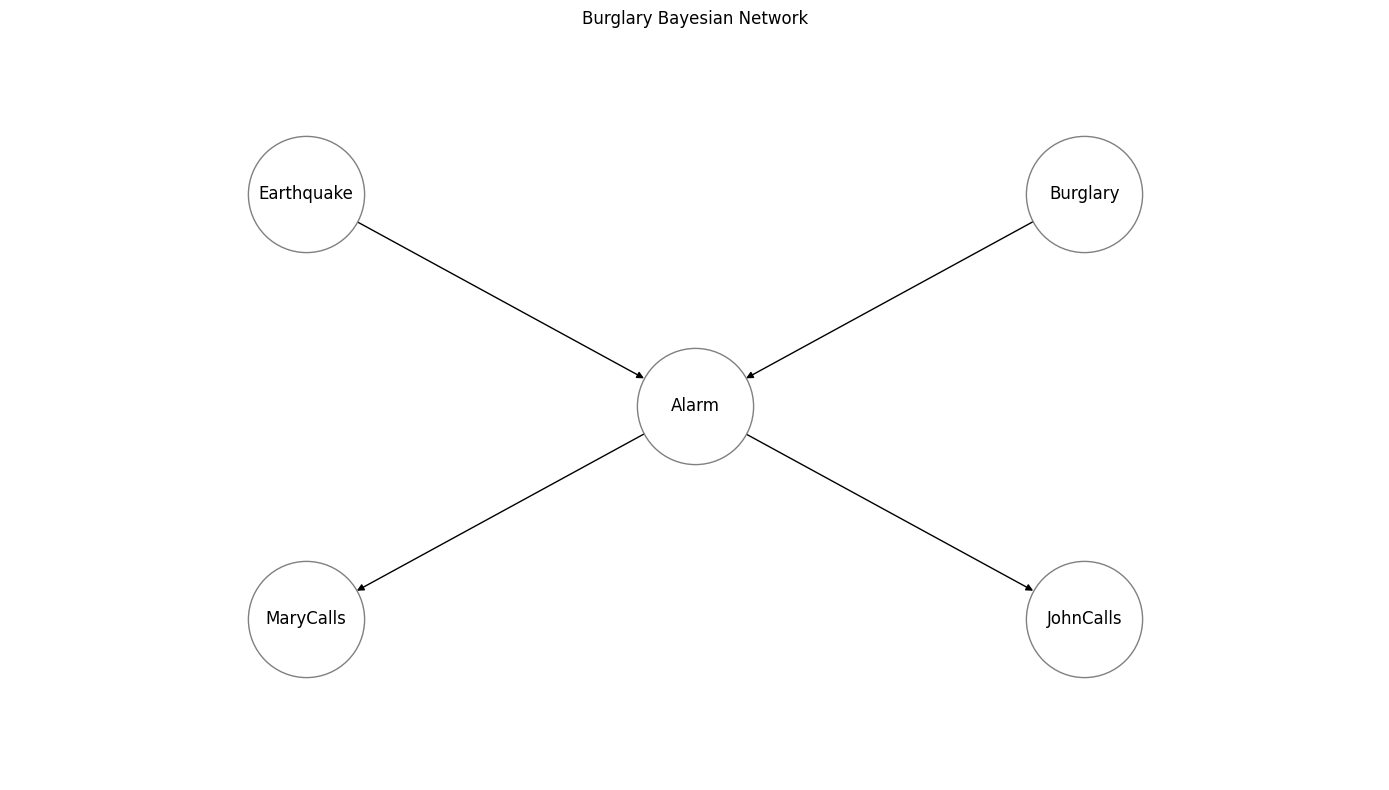

BayesianNet:
[('Burglary', 'parent(s):'), ('Earthquake', 'parent(s):'), ('Alarm', 'parent(s): Burglary Earthquake'), ('JohnCalls', 'parent(s): Alarm'), ('MaryCalls', 'parent(s): Alarm')]


In [3]:
bn.draw(title="Burglary Bayesian Network")

print(bn)

## Modelling BNs (4 points)

As your first task, you will have to model a BN, with all its dependencies, based on a story we provide. 
The story is the following, where you should fill in the gaps `<x>` with (binary) random variables that you consider fitting to the story: 

<div class="alert alert-success">
In the magical forest of a unicorn world, assume we want to construct a Bayesian Net that models a unicorn's decision to <code><1></code> on a specific day or not. We want to model this decision with a Boolean random variable, <code><1></code>. We know whether the unicorn is <code><2></code> or not. Furthermore, we know that the decision to <code><1></code> is influenced by factors such as the unicorns <code><3></code>, <code><4></code>, and <code><5></code>. We also know that <code><6></code> influences <code><5></code>.
</div>
    
First, define and name the appropriate 6 random variables in the corresponding `var_x` in what follows. Make sure that the variable name you pick for `<1>` is stored in the Python variable `var_1`, etc! Then, build a BN structure with the variables, in a way that reflects the dependencies as described in the above text. Finally, draw the BN, and include your matriculation number in the title of the plot! 

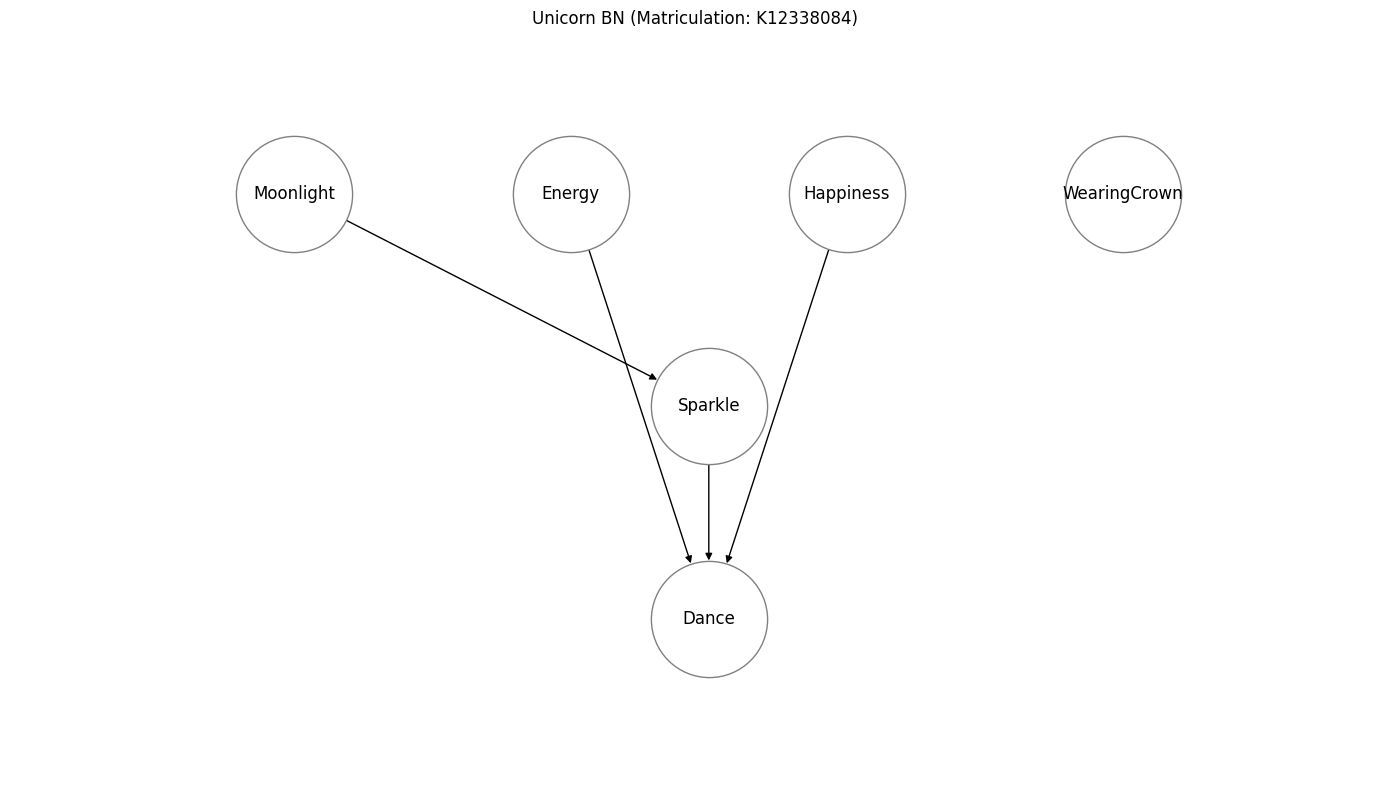

BayesianNet:
[('WearingCrown', 'parent(s):'), ('Happiness', 'parent(s):'), ('Energy', 'parent(s):'), ('Moonlight', 'parent(s):'), ('Sparkle', 'parent(s): Moonlight'), ('Dance', 'parent(s): Happiness Energy Sparkle')]


In [4]:
var_1 = "Dance"
var_2 = "WearingCrown"
var_3 = "Happiness"
var_4 = "Energy"
var_5 = "Sparkle"
var_6 = "Moonlight"

T, F = True, False

# define / update variables
# YOUR CODE HERE

# build BN
bn = BayesianNet([
    # Root nodes (no parents) -- just place some example marginal probabilities:
    (var_2, '', 0.4),  # P(WearingCrown = T) = 0.4
    (var_3, '', 0.7),  # P(Happiness = T) = 0.7
    (var_4, '', 0.5),  # P(Energy = T) = 0.5
    (var_6, '', 0.3),  # P(Moonlight = T) = 0.3

    # Sparkle depends on Moonlight
    # Example conditional distribution:
    # P(Sparkle = T | Moonlight = T) = 0.9,  P(Sparkle = T | Moonlight = F) = 0.2
    (var_5, var_6, {
        (T,): 0.9,
        (F,): 0.2
    }),

    # Dance depends on Happiness, Energy, Sparkle
    # We'll define P(Dance = T | H, E, S) with random example numbers:
    (var_1, f"{var_3} {var_4} {var_5}", {
        (T, T, T): 0.95,
        (T, T, F): 0.7,
        (T, F, T): 0.75,
        (T, F, F): 0.4,
        (F, T, T): 0.6,
        (F, T, F): 0.3,
        (F, F, T): 0.2,
        (F, F, F): 0.05
    })
])

# draw BN
# YOUR CODE HERE
matriculation_number = "K12338084"
bn.draw(title=f"Unicorn BN (Matriculation: {matriculation_number})")

print(bn)


In [5]:
# test cell, don't edit or delete
# In the following tests, we are going to check whether the network you defined follows the expected structure...

In [6]:
# test cell, don't edit or delete

In [7]:
# test cell, don't edit or delete

In [8]:
# test cell, don't edit or delete

In [9]:
# test cell, don't edit or delete

In [10]:
# test cell, don't edit or delete

## Computing Probabilities with BNs (4 points)

In this part of the assignment, you will have to implement two functions, `chain_atomic`, and `event_probability`. The first function, `chain_atomic`, computes the probability of an atomic event (= all variables have an assigned value) for a BN. The second function, `event_probability`, computes the probability for any (non-atomic) event - it does so by recursively filling up missing variable values, until we only have atomic events left. You can find all the functions necessary for these implementations in the 'Notes' directly in the function description.

In [21]:
def extend_dict(e: dict, var: str, val):
    """ Creates new dict with everything contained in e, plus var:val items. """
    return {**e, var: val}

def chain_atomic(bn: BayesianNet, atomic_event: dict):
    """
        Given a particular atomic event, applies chain rule for BN to determine P(atomic_event). This event must assign a value to each random variable of the BN.
        
        bn: BayesianNet instance, in which all random variables of the event have to be defined.
        atomic_event: dict, where keys are names of random variables, which are associated with their values.
        
        Returns: probability of event P(atomic_event), as computed with the chain rule for BNs

        Notes for Students
        ------------------
        - A list of all nodes (random variables) of a BN can be accessed via the `nodes` field; they are of class `BayesianNode`.
        - The conditional probability that a `BayesianNode` encapsulates can be accessed via the `cond_probability` function. 
          It takes two parameters, a boolean (the value for that random variable - where the name can be accessed via `node.rand_var`), and 
          an event dict, which assigns a value (at least) to all of the parent variables of the current variable
        - The parents of a node can be accessed, if necessary, via `node.parents`
        - You can use the `prod` function of the math package if you consider it helpful
    """
    # YOUR CODE HERE
    # multiply node.cond_probability(value_of_node, event_with_parents_only)
    # for each node in bn.nodes
    probabilities = []
    for node in bn.nodes:
        node_val = atomic_event[node.rand_var]  # T/F for this node
        # cond_probability takes (bool_val, event_dict) 
        # event_dict should at least contain the values for the node's parents
        probabilities.append(node.cond_probability(node_val, atomic_event))
    return prod(probabilities)


def event_probability(bn: BayesianNet, event: dict):
    """
        Recursive function to compute probability of any (non-atomic) event. 
        The event must not assign a value to each random variable in the world of the BN (this is done recursively in this function). 

        bn: BayesianNet instance
        event: dict, where entries are: {random variable: value}
        Returns: probability of `event` in this BN.

        Notes for Students
        ------------------
        - This function is to be implemented recursively, so that all missing variables can be filled up one by one. 
          We provide you with a list of all missing variables in `Y`, and you can assign values to them one by one, starting e.g., with the cur_Y = Y[0], etc.
        - If you need a function that easily allows you to 'copy' a dict and adds a new `var: val` pair, you may use `extend_dict`
    """
    missing = [rv for rv in bn.rand_vars if rv not in event]
    if not missing:
        # 已指定所有变量 => 原子事件
        return chain_atomic(bn, event)
    else:
        var = missing[0]
        # 注意：要先将 total 初始化为 0.0，否则会报 UnboundLocalError
        total = 0.0
        for val in [True, False]:
            ext_e = extend_dict(event, var, val)
            total += event_probability(bn, ext_e)
        return total

In [22]:
# cell you can use for debugging - please delete content (not cell) afterwards

In [23]:
# test cell, don't edit or delete

In [24]:
# test cell, don't edit or delete

## Exact Inference with BNs (3 points + 4 points in Moodle quiz)

For the last part of this assignment, you will have to check out the `Exact Inference` quiz on Moodle. Then:

1. Implement the BN that is shown in the quiz.
*Note that if you restart the quiz multiple times, you could end up with a different BN, so make sure to enter the correct probabilities in the end.*

2. Then, compute the required probabilities / factors with the help of the BN, and the function we previously implemented (`event_probability`). You will have to compute two probabilities, two conditional probabilities, and their normalisation factor alpha, and store them in the prepared variables. Please do not change the names of the variables, as they are subsequently used to run some tests. You may, however, change the order in which you want to compute the variables. 

More precisely, you will have to compute the following elements, and enter them into Moodle:
- Two conditional probabilities P(x | y, z, ...) (should be stored in `P_cond_event`) and P(not x | y, z, ...) (should be stored in `P_cond_not_event`)
- Their normalisation factor, which should be stored in `alpha`
- And the two probabilities P(x, y, z, ...) (stored in `P_event`) and P(not x, y, z, ...) (stored in `P_not_event`) 

In [25]:
from math import prod

T, F = True, False

bn = BayesianNet([
        # YOUR CODE HERE
    # Parentless nodes, specify P(X=T) directly:
    ("SP", "", 0.1),   # P(sp) = 0.1
    ("ME", "", 0.25),  # P(me) = 0.25
    ("MP", "", 0.06),  # P(mp) = 0.06

    # Relaxed depends on Spa, Meditation
    ("RE", "SP ME", {
        (T, T): 0.9,   # P(re=T|sp=T,me=T)
        (T, F): 0.5,   # P(re=T|sp=T,me=F)
        (F, T): 0.6,   # P(re=T|sp=F,me=T)
        (F, F): 0.2    # P(re=T|sp=F,me=F)
    }),

    # Dancing depends on MusicPlaying
    ("DA", "MP", {
        (T,): 0.55,    # P(da=T|mp=T)
        (F,): 0.07     # P(da=T|mp=F)
    }),

    # Singing depends on MusicPlaying
    ("SI", "MP", {
        (T,): 0.15,    # P(si=T|mp=T)
        (F,): 0.07     # P(si=T|mp=F)
    }),

    # Happy depends on Relaxed, Dancing
    ("HA", "RE DA", {
        (T, T): 0.86,  # P(ha=T|re=T,da=T)
        (T, F): 0.5,   # P(ha=T|re=T,da=F)
        (F, T): 0.7,   # P(ha=T|re=F,da=T)
        (F, F): 0.09   # P(ha=T|re=F,da=F)
    }),
    ])

# P_event = 0.
# P_not_event = 0.
# alpha = 0.
# P_cond_event = 0.
# P_cond_not_event = 0.

# (1) alpha = 1 / (P(RE, si, me, da, ha) + P(¬RE, si, me, da, ha))
#    先计算分子和分母
P_re_si_me_da_ha = event_probability(bn, {"RE": T,"SI":T,"ME":T,"DA":T,"HA":T})
P_notRe_si_me_da_ha = event_probability(bn, {"RE":F,"SI":T,"ME":T,"DA":T,"HA":T})

alpha = 1.0 / (P_re_si_me_da_ha + P_notRe_si_me_da_ha)

# (2) P(si, re, ha, me, da)
P_si_re_ha_me_da = event_probability(bn, {"SI":T,"RE":T,"HA":T,"ME":T,"DA":T})

# (3) P(si, ¬re, ha, me, da)
P_si_notRe_ha_me_da = event_probability(bn, {"SI":T,"RE":F,"HA":T,"ME":T,"DA":T})

# (4) P(re | si, me, da, ha) = alpha * P(RE, si, me, da, ha)
P_cond_event = alpha * P_re_si_me_da_ha

# (5) P(¬re | si, me, da, ha) = alpha * P(¬RE, si, me, da, ha)
P_cond_not_event = alpha * P_notRe_si_me_da_ha

# 打印结果，为保证通过题目要求，保留至少4位小数
print(f"(1) alpha = {alpha:.6f}")
print(f"(2) P(si, re, ha, me, da) = {P_si_re_ha_me_da:.6f}")
print(f"(3) P(si, ¬re, ha, me, da) = {P_si_notRe_ha_me_da:.6f}")
print(f"(4) P(re | si, me, da, ha) = {P_cond_event:.6f}")
print(f"(5) P(¬re | si, me, da, ha) = {P_cond_not_event:.6f}")

(1) alpha = 522.708769
(2) P(si, re, ha, me, da) = 0.001294
(3) P(si, ¬re, ha, me, da) = 0.000619
(4) P(re | si, me, da, ha) = 0.676573
(5) P(¬re | si, me, da, ha) = 0.323427


In [ ]:
# test cell, don't edit or delete
# In the following tests, we are going to check whether the different probabilities were computed correctly... 

In [ ]:
# test cell, don't edit or delete

In [ ]:
# test cell, don't edit or delete

In [ ]:
# test cell, don't edit or delete